In [1]:
#importing some basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [2]:
#importing datasets
normal = pd.read_csv('/content/drive/MyDrive/AI/ANN/ptbdb_normal.csv')
abnormal = pd.read_csv('/content/drive/MyDrive/AI/ANN/ptbdb_abnormal.csv')

In [3]:
#viewing normal dataset
normal.head()

,1.000000000000000000e+00,9.003241658210754395e-01,3.585899472236633301e-01,5.145867168903350830e-02,4.659643396735191345e-02,1.268233358860015869e-01,1.333063244819641113e-01,1.191247999668121338e-01,1.106158867478370667e-01,1.130470037460327148e-01,1.065640226006507874e-01,1.069692075252532959e-01,1.158833056688308716e-01,1.223662868142127991e-01,1.223662868142127991e-01.1,1.195299848914146423e-01,1.158833056688308716e-01.1,1.223662868142127991e-01.2,1.260129660367965698e-01,1.337115019559860229e-01,1.349270641803741455e-01,1.426256150007247925e-01,1.511345207691192627e-01,1.584278792142868042e-01,1.636953055858612061e-01,1.738249659538269043e-01,1.888168603181838989e-01,2.078606188297271729e-01,2.309562414884567261e-01,2.585089206695556641e-01,2.945705056190490723e-01,3.257698416709899902e-01,3.626418113708496094e-01,3.982982039451599121e-01,4.294975697994232178e-01,4.493516981601715088e-01,4.509724378585815430e-01,4.189627170562744141e-01,3.727714717388153076e-01,3.103727698326110840e-01,...,0.000000000000000000e+00.26,0.000000000000000000e+00.27,0.000000000000000000e+00.28,0.000000000000000000e+00.29,0.000000000000000000e+00.30,0.000000000000000000e+00.31,0.000000000000000000e+00.32,0.000000000000000000e+00.33,0.000000000000000000e+00.34,0.000000000000000000e+00.35,0.000000000000000000e+00.36,0.000000000000000000e+00.37,0.000000000000000000e+00.38,0.000000000000000000e+00.39,0.000000000000000000e+00.40,0.000000000000000000e+00.41,0.000000000000000000e+00.42,0.000000000000000000e+00.43,0.000000000000000000e+00.44,0.000000000000000000e+00.45,0.000000000000000000e+00.46,0.000000000000000000e+00.47,0.000000000000000000e+00.48,0.000000000000000000e+00.49,0.000000000000000000e+00.50,0.000000000000000000e+00.51,0.000000000000000000e+00.52,0.000000000000000000e+00.53,0.000000000000000000e+00.54,0.000000000000000000e+00.55,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,0.361781,0.362400,0.366110,0.367965,0.374150,0.377860,0.382189,0.384663,0.398887,0.401361,0.418058,0.443414,0.457638,0.487941,0.520717,0.559678,0.604205,0.634508,0.653680,0.672851,0.678417,0.660482,0.621521,0.555968,0.482375,0.438466,0.378479,0.351268,0.319728,0.306741,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,0.077342,0.087223,0.091993,0.095060,0.096422,0.104940,0.108007,0.113799,0.116525,0.119932,0.124361,0.132198,0.145826,0.152641,0.163543,0.175468,0.189438,0.204770,0.229302,0.252811,0.275980,0.302555,0.321295,0.333901,0.345826,0.348552,0.347189,0.334242,0.306644,0.274617,...,0.168313,0.170017,0.174106,0.178194,0.183646,0.186371,0.191141,0.194549,0.201704,0.208177,0.212266,0.219762,0.227598,0.238842,0.249063,0.254514,0.270187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,0.049059,0.051341,0.049344,0.045921,0.049914,0.053908,0.049629,0.045921,0.055048,0.053622,0.063605,0.066172,0.083286,0.094980,0.115801,0.131204,0.153166,0.178266,0.210211,0.232744,0.266115,0.286651,0.305762,0.317456,0.304906,0.264689,0.223902,0.191671,0.140901,0.111808,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.867238,0.201360,0.09934

In [4]:
#viewing abnormal dataset
abnormal.head()

,9.322328567504882812e-01,8.696785569190979004e-01,8.861859440803527832e-01,9.296264052391052246e-01,9.087749719619750977e-01,9.339704513549804688e-01,8.010425567626953125e-01,7.497828006744384766e-01,6.872285008430480957e-01,6.350998878479003906e-01,6.498696804046630859e-01,6.350998878479003906e-01.1,6.550825238227844238e-01,6.646394729614257812e-01,6.333622932434082031e-01,7.463075518608093262e-01,8.714161515235900879e-01,9.383144974708557129e-01,1.000000000000000000e+00,9.487402439117431641e-01,3.961772322654724121e-01,0.000000000000000000e+00,3.909643739461898804e-02,1.285838335752487183e-01,3.058210313320159912e-01,6.403127908706665039e-01,6.177237033843994141e-01,5.377932190895080566e-01,3.527367413043975830e-01,2.206776738166809082e-01,2.562988698482513428e-01,3.579496145248413086e-01,4.821893870830535889e-01,5.708079934120178223e-01,5.777584910392761230e-01,6.203301548957824707e-01,6.220677495002746582e-01,6.185925006866455078e-01,6.264117956161499023e-01,6.125108599662780762e-01,...,0.000000000000000000e+00.87,0.000000000000000000e+00.88,0.000000000000000000e+00.89,0.000000000000000000e+00.90,0.000000000000000000e+00.91,0.000000000000000000e+00.92,0.000000000000000000e+00.93,0.000000000000000000e+00.94,0.000000000000000000e+00.95,0.000000000000000000e+00.96,0.000000000000000000e+00.97,0.000000000000000000e+00.98,0.000000000000000000e+00.99,0.000000000000000000e+00.100,0.000000000000000000e+00.101,0.000000000000000000e+00.102,0.000000000000000000e+00.103,0.000000000000000000e+00.104,0.000000000000000000e+00.105,0.000000000000000000e+00.106,0.000000000000000000e+00.107,0.000000000000000000e+00.108,0.000000000000000000e+00.109,0.000000000000000000e+00.110,0.000000000000000000e+00.111,0.000000000000000000e+00.112,0.000000000000000000e+00.113,0.000000000000000000e+00.114,0.000000000000000000e+00.115,0.000000000000000000e+00.116,0.000000000000000000e+00.117,0.000000000000000000e+00.118,0.000000000000000000e+00.119,0.000000000000000000e+00.120,0.000000000000000000e+00.121,0.000000000000000000e+00.122,0.000000000000000000e+00.123,0.000000000000000000e+00.124,0.000000000000000000e+00.125,1.000000000000000000e+00.1
0,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,0.125101,0.129136,0.137207,0.137207,0.132365,0.126715,0.158192,0.152542,0.132365,0.168684,0.156578,0.183212,0.191283,0.204197,0.230024,0.244552,0.285714,0.307506,0.321227,0.327684,0.351897,0.373688,0.397094,0.363196,0.340597,0.307506,0.258273,0.197740,0.199354,0.173527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,0.681260,0.616743,0.624424,0.619816,0.596006,0.627496,0.631336,0.619048,0.612903,0.613671,0.607527,0.586790,0.568356,0.543779,0.526882,0.552995,0.577573,0.592166,0.576037,0.579109,0.573733,0.589862,0.542243,0.519201,0.514593,0.528418,0.493856,0.485407,0.461598,0.478495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,0.357671,0.379852,0.375231,0.397412,0.388170,0.378004,0.398336,0.419593,0.427911,0.402033,0.378928,0.400185,0.406654,0.422366,0.402033,0.383549,0.398336,0.393715,0.417745,0.388170,0.360444,0.402957,0.392791,0.413124,0.377079,0.327172,0.346580,0.338262,0.356747,0.314233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,0.285566,0.343718,0.281412,0.281412,0.283489,0.281412,0.319834,0.311526,0.283489,0.278297,0.274143,0.317757,0.267913,0.275182,0.280374,0.255452,0.313603,0.266874,0.244029,0.19833

In [5]:
#dimenion for normal
normal.shape

(4045, 188)

In [6]:
#dimenion for abnormal
abnormal.shape

(10505, 188)

In [7]:
#changing the random column names to sequential - normal
#as we have some numbers name as columns we need to change that to numbers as
for normals in normal:
    normal.columns = list(range(len(normal.columns)))

In [8]:
#viewing edited columns for normal data
normal.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,0.361781,0.362400,0.366110,0.367965,0.374150,0.377860,0.382189,0.384663,0.398887,0.401361,0.418058,0.443414,0.457638,0.487941,0.520717,0.559678,0.604205,0.634508,0.653680,0.672851,0.678417,0.660482,0.621521,0.555968,0.482375,0.438466,0.378479,0.351268,0.319728,0.306741,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,0.077342,0.087223,0.091993,0.095060,0.096422,0.104940,0.108007,0.113799,0.116525,0.119932,0.124361,0.132198,0.145826,0.152641,0.163543,0.175468,0.189438,0.204770,0.229302,0.252811,0.275980,0.302555,0.321295,0.333901,0.345826,0.348552,0.347189,0.334242,0.306644,0.274617,...,0.168313,0.170017,0.174106,0.178194,0.183646,0.186371,0.191141,0.194549,0.201704,0.208177,0.212266,0.219762,0.227598,0.238842,0.249063,0.254514,0.270187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,0.049059,0.051341,0.049344,0.045921,0.049914,0.053908,0.049629,0.045921,0.055048,0.053622,0.063605,0.066172,0.083286,0.094980,0.115801,0.131204,0.153166,0.178266,0.210211,0.232744,0.266115,0.286651,0.305762,0.317456,0.304906,0.264689,0.223902,0.191671,0.140901,0.111808,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,0.086931,0.094027,0.095801,0.096393,0.089592,0.094914,0.089592,0.094914,0.098167,0.102306,0.099645,0.096688,0.108516,0.127735,0.128326,0.149024,0.172383,0.204021,0.221762,0.254287,0.284743,0.309284,0.329687,0.344175,0.359846,0.333530,0.292135,0.253400,0.216736,0.171496,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,0.113108,0.132353,0.129993,0.132898,0.137255,0.151235,0.157952,0.155592,0.180102,0.187001,0.200254,0.225127,0.239833,0.274510,0.287219,0.313726,0.336783,0.347313,0.354212,0.340051,0.316812,0.267792,0.223675,0.180102,0.156137,0.134895,0.114016,0.106754,0.104757,0.088235,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#changing the random column names to sequential - abnormal
#as we have some numbers name as columns we need to change that to numbers as
for abnormals in abnormal:
    abnormal.columns = list(range(len(abnormal.columns)))

In [10]:
#viewing edited columns for abnormal data
abnormal.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,0.125101,0.129136,0.137207,0.137207,0.132365,0.126715,0.158192,0.152542,0.132365,0.168684,0.156578,0.183212,0.191283,0.204197,0.230024,0.244552,0.285714,0.307506,0.321227,0.327684,0.351897,0.373688,0.397094,0.363196,0.340597,0.307506,0.258273,0.197740,0.199354,0.173527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,0.681260,0.616743,0.624424,0.619816,0.596006,0.627496,0.631336,0.619048,0.612903,0.613671,0.607527,0.586790,0.568356,0.543779,0.526882,0.552995,0.577573,0.592166,0.576037,0.579109,0.573733,0.589862,0.542243,0.519201,0.514593,0.528418,0.493856,0.485407,0.461598,0.478495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,0.357671,0.379852,0.375231,0.397412,0.388170,0.378004,0.398336,0.419593,0.427911,0.402033,0.378928,0.400185,0.406654,0.422366,0.402033,0.383549,0.398336,0.393715,0.417745,0.388170,0.360444,0.402957,0.392791,0.413124,0.377079,0.327172,0.346580,0.338262,0.356747,0.314233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,0.285566,0.343718,0.281412,0.281412,0.283489,0.281412,0.319834,0.311526,0.283489,0.278297,0.274143,0.317757,0.267913,0.275182,0.280374,0.255452,0.313603,0.266874,0.244029,0.198339,0.192108,0.190031,0.134995,0.086189,0.078920,0.036345,0.024922,0.000000,0.044652,0.024922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,0.214724,0.207474,0.207474,0.232013,0.236475,0.255438,0.241495,0.248187,0.254322,0.274400,0.288344,0.290017,0.298383,0.319018,0.328500,0.342443,0.335192,0.329615,0.321807,0.317345,0.307306,0.281093,0.261573,0.258784,0.254322,0.253207,0.235917,0.223090,0.232013,0.225321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
#combining two data into one
#suffling the dataset and dropping the index
#As when concatenating we all have arranged 0 and 1 class in order manner
dataset = pd.concat([normal, abnormal], axis=0).sample(frac=1.0, random_state =0).reset_index(drop=True)

In [12]:
#viewing combined dataset
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.487164,0.368582,0.424205,0.346577,0.328851,0.287897,0.295232,0.333741,0.306846,0.333130,0.314181,0.333130,0.353912,0.326406,0.347188,0.327017,0.336797,0.341076,0.320293,0.344132,0.328851,0.339242,0.331907,0.279951,0.307457,0.266504,0.250000,0.239609,0.186430,0.185819,0.161369,0.176039,0.203545,0.209658,0.265892,0.272616,0.307457,0.309902,0.311736,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.960630,0.981252,0.764154,0.410949,0.155980,0.009749,0.064867,0.130484,0.123360,0.126359,0.128984,0.130109,0.133108,0.127484,0.140607,0.145857,0.149606,0.155980,0.155980,0.164979,0.164979,0.182602,0.178853,0.191226,0.202100,0.216723,0.228721,0.239970,0.266217,0.294338,0.317210,0.344207,0.372328,0.386952,0.400825,0.419198,0.401950,0.388826,0.357330,0.328084,...,0.198725,0.216348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.960156,0.596484,0.528906,0.286719,0.113281,0.108984,0.040234,0.021484,0.030469,0.000000,0.009375,0.006641,0.002344,0.013672,0.002344,0.016016,0.015234,0.000391,0.039453,0.017578,0.028516,0.039062,0.030859,0.071875,0.051562,0.082031,0.087891,0.080078,0.114063,0.092188,0.121094,0.125000,0.116406,0.121875,0.110156,0.095312,0.086719,0.056641,0.059375,0.044141,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.000000,0.526476,0.387097,0.384662,0.421181,0.335971,0.231284,0.276324,0.211808,0.237371,0.279976,0.267803,0.284236,0.297018,0.325015,0.262934,0.254413,0.299452,0.351795,0.255630,0.234936,0.293974,0.246500,0.188679,0.188679,0.184419,0.157030,0.161290,0.106512,0.090079,0.088253,0.093122,0.132075,0.133901,0.168594,0.189897,0.203287,0.250761,0.240414,0.265977,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.957125,0.695460,0.343001,0.159521,0.085750,0.075662,0.108449,0.089533,0.108449,0.105296,0.110971,0.123581,0.101513,0.111602,0.135561,0.134931,0.145019,0.121690,0.121059,0.140605,0.138714,0.155107,0.127995,0.148802,0.151324,0.146280,0.170870,0.150694,0.173392,0.173392,0.169609,0.163304,0.139975,0.153216,0.125473,0.098361,0.085750,0.037831,0.032787,0.022699,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14550 entries, 0 to 14549
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 20.9 MB


In [14]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
count,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,...,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.000000,14550.0,14550.000000
mean,0.976638,0.721640,0.403068,0.242859,0.207181,0.216410,0.221718,0.224457,0.227325,0.229684,0.232407,0.234144,0.237036,0.240411,0.242943,0.246591,0.249430,0.252955,0.257124,0.260686,0.264782,0.269313,0.276739,0.286950,0.297295,0.308767,0.318717,0.328268,0.337902,0.345826,0.352126,0.355228,0.355946,0.353512,0.346804,0.338669,0.327206,0.315705,0.303896,0.292646,...,0.025756,0.025406,0.022812,0.021569,0.021423,0.020435,0.018679,0.018616,0.016480,0.014971,0.014180,0.012923,0.011588,0.011587,0.010658,0.009640,0.009008,0.008502,0.007786,0.007773,0.007021,0.006513,0.005503,0.004202,0.002985,0.002878,0.002438,0.002053,0.001874,0.001425,0.001190,0.001133,0.000900,0.000739,0.000661,0.000475,0.000177,0.000185,0.0,0.721993
std,0.034532,0.195694,0.249779,0.249466,0.218030,0.192331,0.180687,0.176900,0.176642,0.176557,0.177012,0.176971,0.178145,0.180070,0.180499,0.182093,0.183595,0.182999,0.182594,0.182712,0.179952,0.179565,0.178656,0.179686,0.182038,0.184804,0.186576,0.188397,0.191145,0.194217,0.196929,0.199419,0.200155,0.199017,0.195489,0.190689,0.185559,0.181366,0.178096,0.175830,...,0.094819,0.093493,0.087462,0.086235,0.086744,0.085910,0.083538,0.082976,0.077174,0.074095,0.073587,0.069384,0.066344,0.066575,0.064687,0.062722,0.061075,0.059165,0.057925,0.058404,0.055695,0.053853,0.048517,0.040929,0.033307,0.033092,0.030419,0.027012,0.026426,0.022356,0.021363,0.021014,0.017317,0.014641,0.014034,0.012290,0.006545,0.006836,0.0,0.448032
min,0.624227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.959381,0.584500,0.212294,0.052278,0.061899,0.090473,0.096495,0.097092,0.097225,0.097127,0.097499,0.098432,0.099969,0.103042,0.105475,0.108973,0.112875,0.116840,0.121911,0.126203,0.131895,0.137005,0.145782,0.155666,0.164777,0.174707,0.182525,0.190911,0.200504,0.209034,0.215769,0.216394,0.214690,0.209391,0.202964,0.197474,0.186038,0.176804,0.167574,0.157959,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [15]:
dataset.shape

(14550, 188)

In [17]:
dataset.nunique()

0       6905
1      13303
2      14020
3      12749
4      13172
       ...  
183       33
184       15
185       15
186        1
187        2
Length: 188, dtype: int64

In [18]:
#skewness of the dataset
#the deviation of the distribution of the data from a normal distribution
#+ve mean > median > mode
#-ve mean < median < mode
dataset.skew()

0      -1.996666
1      -0.476897
2       0.522176
3       1.341882
4       1.695414
         ...    
183    33.173038
184    43.456478
185    42.695593
186     0.000000
187    -0.991106
Length: 188, dtype: float64

In [19]:
#kurtosis of dataset
#identifies whether the tails of a given distribution contain extreme values
#Leptokurtic indicates a positive excess kurtosis
#mesokurtic distribution shows an excess kurtosis of zero or close to zero
#platykurtic distribution shows a negative excess kurtosis
dataset.kurtosis()

0         6.525932
1        -0.358119
2        -0.432733
3         1.049821
4         2.382486
          ...     
183    1268.425311
184    2057.330509
185    1970.628170
186       0.000000
187      -1.017849
Length: 188, dtype: float64

In [20]:
#missing values any from the dataset
print(str('Any missing data or NaN in the dataset:'), dataset.isnull().values.any())

Any missing data or NaN in the dataset: False


In [21]:
#data ranges in the dataset - sample
print("The minimum and maximum values are {}, {}".format(np.min(dataset.iloc[-2,:].values), np.max(dataset.iloc[-2,:].values)))

The minimum and maximum values are 0.0, 1.0


In [22]:
#correlation for all features in the dataset
correlation_data =dataset.corr()
print(correlation_data)

          0         1         2         3    ...       184       185  186       187
0    1.000000 -0.144659 -0.177473 -0.152565  ... -0.005036 -0.005020  NaN -0.054400
1   -0.144659  1.000000  0.751293  0.500776  ... -0.004615 -0.004240  NaN  0.032348
2   -0.177473  0.751293  1.000000  0.838456  ... -0.008376 -0.008052  NaN  0.227082
3   -0.152565  0.500776  0.838456  1.000000  ... -0.004826 -0.004498  NaN  0.306628
4   -0.096012  0.305996  0.622193  0.872606  ... -0.007732 -0.007584  NaN  0.337449
..        ...       ...       ...       ...  ...       ...       ...  ...       ...
183  0.000727 -0.013414 -0.002895  0.013430  ...  0.507711  0.507192  NaN -0.021190
184 -0.005036 -0.004615 -0.008376 -0.004826  ...  1.000000  0.999194  NaN -0.026262
185 -0.005020 -0.004240 -0.008052 -0.004498  ...  0.999194  1.000000  NaN -0.026180
186       NaN       NaN       NaN       NaN  ...       NaN       NaN  NaN       NaN
187 -0.054400  0.032348  0.227082  0.306628  ... -0.026262 -0.026180  NaN  1

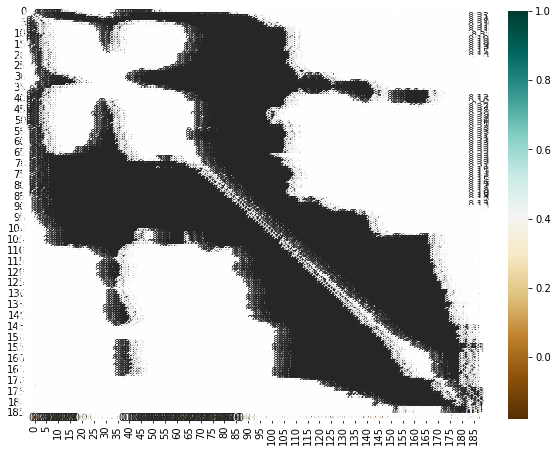

In [23]:
#visulaization for correlation
plt.figure(figsize=(10,7.5))
sns.heatmap(correlation_data, annot=True, cmap='BrBG')

In [24]:
#for target value count
label_dataset = dataset[187].value_counts()
label_dataset

1.0    10505
0.0     4045
Name: 187, dtype: int64

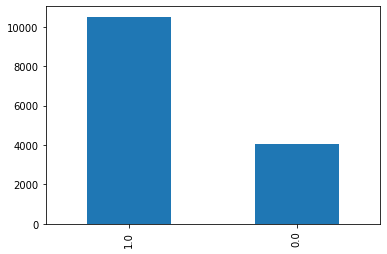

In [25]:
#visualization for target label
label_dataset.plot.bar()

In [26]:
#splitting dataset to dependent and independent variable
X = dataset.iloc[:,:-1].values #independent values / features
y = dataset.iloc[:,-1].values #dependent values / target

In [27]:
#checking imbalance of the labels
from collections import Counter
counter_before = Counter(y)
print(counter_before)

Counter({1.0: 10505, 0.0: 4045})


In [28]:
#applying SMOTE for imbalance
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [29]:
#after applying SMOTE for imbalance condition
counter_after = Counter(y)
print(counter_after)

Counter({1.0: 10505, 0.0: 10505})


In [30]:
#splitting the datasets for training and testing process
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=42)

In [31]:
#size for the sets
print('size of X_train:', X_train.shape)
print('size of X_test:', X_test.shape)
print('size of y_train:', y_train.shape)
print('size of y_test:', y_test.shape)

size of X_train: (14707, 187)
size of X_test: (6303, 187)
size of y_train: (14707,)
size of y_test: (6303,)


In [32]:
#ANN
import tensorflow as tf
# Create / initialize sequential model 
ann_model = tf.keras.models.Sequential()
#Dense layer as first layer with 10 neurons, input share (187,) and and leaky Relu activation
ann_model.add(tf.keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape=(187,)))
#Dense layer as second layer with 10 neurons and leaky Relu activation
ann_model.add(tf.keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Dense layer as third layer with 10 neurons and leaky Relu activation
ann_model.add(tf.keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Dense layer as fourth layer with 10 neurons and leaky Relu activation
ann_model.add(tf.keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Softmax as last layer with two outputs
ann_model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [33]:
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                3760      
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 2)                 42        
                                                                 
Total params: 5,062
Trainable params: 5,062
Non-trainable params: 0
_________________________________________________________________


In [35]:
ann_model_history = ann_model.fit(X_train, y_train, epochs=50, batch_size = 10, validation_data = (X_test, y_test))

Epoch 1/50
1471/1471 [==============================] - 6s 3ms/step - loss: 0.4561 - accuracy: 0.7843 - val_loss: 0.3716 - val_accuracy: 0.8466
Epoch 2/50
1471/1471 [==============================] - 5s 3ms/step - loss: 0.3120 - accuracy: 0.8697 - val_loss: 0.2644 - val_accuracy: 0.9035
Epoch 3/50
1471/1471 [==============================] - 4s 3ms/step - loss: 0.2537 - accuracy: 0.9037 - val_loss: 0.2655 - val_accuracy: 0.8993
Epoch 4/50
1471/1471 [==============================] - 5s 3ms/step - loss: 0.2220 - accuracy: 0.9190 - val_loss: 0.2220 - val_accuracy: 0.9199
Epoch 5/50
1471/1471 [==============================] - 4s 3ms/step - loss: 0.1985 - accuracy: 0.9257 - val_loss: 0.2263 - val_accuracy: 0.9080
Epoch 6/50
1471/1471 [==============================] - 4s 3ms/step - loss: 0.1802 - accuracy: 0.9314 - val_loss: 0.2454 - val_accuracy: 0.8991
Epoch 7/50
1471/1471 [==============================] - 4s 3ms/step - loss: 0.1623 - accuracy: 0.9393 - val_loss: 0.1665 - val_accuracy:

Text(0, 0.5, 'Accuracy')

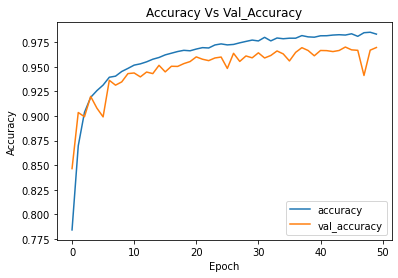

In [36]:
plt.plot(ann_model_history.history['accuracy'])

plt.plot(ann_model_history.history['val_accuracy'])

plt.legend(["accuracy","val_accuracy"])

plt.title('Accuracy Vs Val_Accuracy')

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

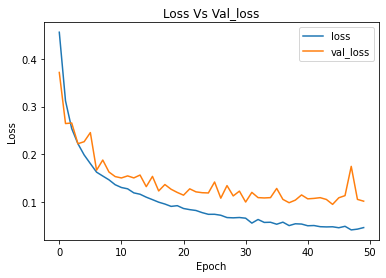

In [37]:
plt.plot(ann_model_history.history['loss'])
plt.plot(ann_model_history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.title('Loss Vs Val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')